# Aula 02

## Homografias

Nesta aula introduziremos o conceito de homografias. Para isso utilizaremos uma aplicação de exemplo: retificação de fotos de documentos.

Considere inicialmente a imagem a seguir:

<img src="foto-documento.jpg" alt="Foto de um documento" style="width: 500px;"/>

O objetivo da retificação de documentos é obter a imagem a seguir:

<img src="documento.jpg" alt="Foto de um documento" style="width: 500px;"/>

## Estimação de homografias

Uma homografia é definida pela matriz:

$$
H = \begin{pmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33} \\
\end{pmatrix}$$

Considere a correspondência de pontos $(p_i, p'_i)$, onde $p_i = (x_i, y_i, 1)^T$ é a coordenada de um ponto na imagem original e $p'_i = (x'_i, y'_i, 1)^T$ é a coordenada correspondente na imagem de destino. Como vimos em aula, é comum utilizarmos $h_{33} = 1$, uma vez que a matriz $H$ pode ser multiplicada por qualquer valor escalar sem alterar o resultado final.

Queremos encontrar $H$ tal que $q = H\cdot p$. Abrindo a multiplicação obtemos:

$$
\begin{pmatrix}
h_{11}x_i + h_{12}y_i + h_{13} \\
h_{21}x_i + h_{22}y_i + h_{23} \\
h_{31}x_i + h_{32}y_i + 1 \\
\end{pmatrix} = \begin{pmatrix}
\frac{h_{11}x_i + h_{12}y_i + h_{13}}{h_{31}x_i + h_{32}y_i + 1} \\
\frac{h_{21}x_i + h_{22}y_i + h_{23}}{h_{31}x_i + h_{32}y_i + 1} \\
1 \\
\end{pmatrix}
$$

Sabemos que esse vetor deve ser igual a $p'_i$, consequentemente o valor de suas coordenadas devem ser iguais. Assim:

$$
\begin{align}
h_{11}x_i + h_{12}y_i + h_{13} &= x'_i(h_{31}x_i + h_{32}y_i + 1) \\
h_{21}x_i + h_{22}y_i + h_{23} &= y'_i(h_{31}x_i + h_{32}y_i + 1)
\end{align}
$$

Reorganizando as equações, temos:

$$
\begin{align}
x_ih_{11} + y_ih_{12} + h_{13} - x_ix'_ih_{31} - y_ix'_ih_{32} &= x'_i \\
x_ih_{21} + y_ih_{22} + h_{23} - x_iy'_ih_{31} - y_iy'_ih_{32} &= y'_i
\end{align}
$$

Que são duas equações de um sistema linear com 8 variáveis (as componentes da matriz $H$, menos $h_{33}$, que já definimos como 1).

Como temos 8 variáveis, precisamos de pelo menos 8 equações no nosso sistema para que ele tenha solução única. Cada correspondência de pontos gera duas equações, logo com 4 correspondências de pontos temos as 8 equações de que precisamos. Montando o sistema como uma multiplicação de matrizes, temos:

$$
\begin{pmatrix}
x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1x'_1 & -y_1x'_1 \\
0 & 0 & 0 & x_1 & y_1 & 1 & -x_1y'_1 & -y_1y'_1 \\
x_2 & y_2 & 1 & 0 & 0 & 0 & -x_2x'_2 & -y_2x'_2 \\
0 & 0 & 0 & x_2 & y_2 & 1 & -x_2y'_2 & -y_2y'_2 \\
x_3 & y_3 & 1 & 0 & 0 & 0 & -x_3x'_3 & -y_3x'_3 \\
0 & 0 & 0 & x_3 & y_3 & 1 & -x_3y'_3 & -y_3y'_3 \\
x_4 & y_4 & 1 & 0 & 0 & 0 & -x_4x'_4 & -y_4x'_4 \\
0 & 0 & 0 & x_4 & y_4 & 1 & -x_4y'_4 & -y_4y'_4
\end{pmatrix}
\begin{pmatrix}
h_{11} \\
h_{12} \\
h_{13} \\
h_{21} \\
h_{22} \\
h_{23} \\
h_{31} \\
h_{32}
\end{pmatrix} = 
\begin{pmatrix}
x'_1 \\
y'_1 \\
x'_2 \\
y'_2 \\
x'_3 \\
y'_3 \\
x'_4 \\
y'_4
\end{pmatrix}
$$

Resolvendo o sistema linear obtemos a matriz de homografia.

# Atividade

1. Abra a imagem do documento e localize as coordenadas dos quatro cantos da folha e monte uma lista com esses pontos;
2. Queremos uma imagem final no formato de uma folha A4 em paisagem. Para isso utilizaremos uma resolução de 1684 X 1190 pixels (você pode alterar os valores se preferir). Monte uma lista com os 4 cantos da imagem de destino, seguindo a mesma ordem do item anterior, ou seja, se o primeiro ponto da lista anterior é o canto superior esquerdo, o primeiro ponto dessa nova lista também deve ser o canto superior esquerdo;
3. Crie uma função que recebe duas listas com correspondências de pontos e devolve uma matriz de homografia:
    
    1. Monte as matrizes do sistema linear descrito acima;
    2. Resolva o sistema linear (pode usar funções prontas, ex: `numpy.linalg.solve`) e monte a matriz de homografia (não se esqueça que a última componente é igual a 1);  
4. Teste sua função. Para isso, utilize a função [findHomography](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780) do OpenCV e compare as matrizes resultantes com a função [numpy.allclose](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.allclose.html);
5. Crie uma matriz de zeros no formato da imagem de destino. Percorra cada pixel dessa imagem aplicando a homografia inversa para descobrir o pixel original e preencha a imagem de destino com aquele pixel (lembre-se da atividade da primeira aula deste módulo). Apresente a imagem resultante neste notebook.

## Desafios

1. Automatize o processo construção dos pares de pontos. Para isso, crie uma função que recebe uma foto e devolve as coordenadas dos quatro cantos do documento;
2. Implemente uma interface gráfica para o seu programa de retificação automática de documentos. Requisitos:
    1. Permitir a seleção do arquivo de entrada;
    2. Permitir o ajuste manual dos cantos detectados na foto;
    3. Permitir a seleção da resolução do arquivo final;
    4. Salvar o documento retificado em um arquivo.
    
  O OpenCV possui funções para criar uma interface gráfica simples. Você pode utilizá-las para implementar seu programa.
    
  **A conclusão satisfatória deste desafio vale até 1 ponto adicional na nota do projeto 4.** Para ganhar até meio ponto a seleção do arquivo de entrada pode ser feita na linha de comando do terminal e a interface gráfica pode ser implementada utilizando somente o OpenCV. Para valer até um ponto é necessário implementar uma interface gráfica completa (para seleção dos arquivos e ajuste dos cantos do documento).

In [40]:
# Imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [71]:
# Item 1
orig = [
    # Coloque os pontos aqui
    (478,402), # Left up
    (80,1242), # Left down
    (1804,80), # Right up
    (1924,1404) # Right down
]



(478, 402)
(80, 1242)
(1804, 80)
(1924, 1404)


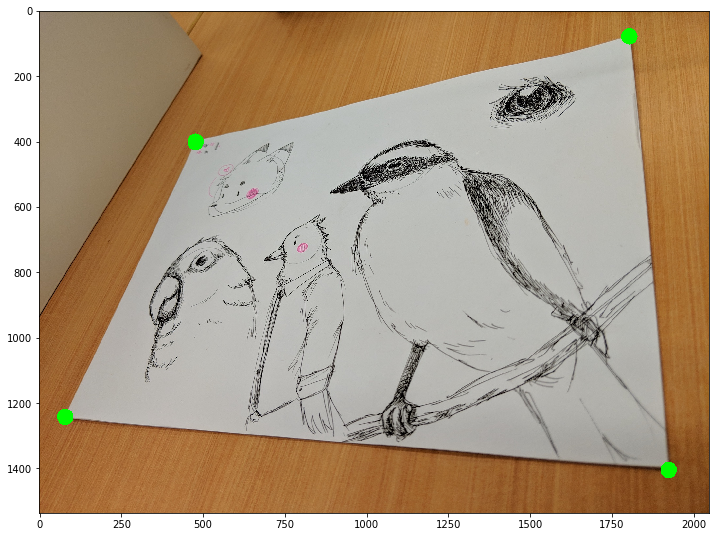

In [72]:
img = cv.imread('foto-documento.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for o in orig:
    print(o)
    cv.circle(img,o, 25, (0,255,0), -1)

plt.figure(figsize=(12, 12))
plt.imshow(img)

In [73]:
# Item 2
dest = [
    (0,0), # LU
    (0,1190), # LD
    (1684,0), # RU
    (1684,1190) # RD
    # Coloque os pontos correspondentes aqui
]





In [62]:
# Item 3
def find_homography(p,pl):
    x1,y1 = p[0]
    x2,y2 = p[1]
    x3,y3 = p[2]
    x4,y4 = p[3]
    
    x_1,y_1 = pl[0]
    x_2,y_2 = pl[1]
    x_3,y_3 = pl[2]
    x_4,y_4 = pl[3]
    
    
    mo= np.array([
        [x1, y1, 1, 0, 0, 0, -(x1*x_1), -(y1*x_1)],
        [0, 0, 0, x1, y1, 1, -(x1*y_1), -(y1*y_1)],
        [x2, y2, 1, 0, 0, 0, -(x2*x_2), -(y2*x_2)],
        [0, 0, 0, x2, y2, 1, -(x2*y_2), -(y2*y_2)],
        [x3, y3, 1, 0, 0, 0, -(x3*x_3), -(y3*x_3)],
        [0, 0, 0, x3, y3, 1, -(x3*y_3), -(y3*y_3)],
        [x4, y4, 1, 0, 0, 0, -(x4*x_4), -(y4*x_4)],
        [0, 0, 0, x4, y4, 1, -(x4*y_4), -(y4*y_4)]
    ])
    
    md = np.array([
        [x_1],
        [y_1],
        [x_2],
        [y_2],
        [x_3],
        [y_3],
        [x_4],
        [y_4]
    ])
    
    mh = np.linalg.solve(mo,md)
    
    nh = np.array([
        [mh[0][0],mh[1][0],mh[2][0]],
        [mh[3][0],mh[4][0],mh[5][0]],
        [mh[6][0],mh[7][0],1]
    ])
    
    return nh
    #return np.linalg.solve(matrix1,matrix2)

In [63]:
homo = find_homography(orig,dest)
print(homo)

[[ 4.57712781e+00  2.16868675e+00 -3.05967917e+03]
 [ 1.11491023e+00  4.59121416e+00 -2.37859518e+03]
 [ 1.15022711e-03  1.42991380e-03  1.00000000e+00]]


In [77]:
# Item 4
# Verifique o resultado da sua função find_homography comparando com a implementação do OpenCV
# Item 2


cv.findHomography(np.array(orig),np.array(dest))

(array([[ 4.57712781e+00,  2.16868675e+00, -3.05967917e+03],
        [ 1.11491023e+00,  4.59121416e+00, -2.37859518e+03],
        [ 1.15022711e-03,  1.42991380e-03,  1.00000000e+00]]), array([[1],
        [1],
        [1],
        [1]], dtype=uint8))

In [82]:
# Item 5
# Crie a imagem final aqui
def aplica_transformacao_v2(img, homo_matrix, size):
    res = np.zeros(size,np.uint8)  # res é a imagem a ser devolvida
    h, w, t = res.shape
    hr, wr, tr = img.shape
    im = np.linalg.inv(homo_matrix)
    
    for i in range(h):
        for j in range(w):
            p = np.dot(im, [j, i, 1])
            p /= p[2]
            if int(p[0]) < 0  or int(p[1]) < 0 or int(p[0]) >= wr or int(p[1]) >= hr:
                pass
            else:
                res[i, j] = img[int(p[1]), int(p[0])]
    return res

img_r = aplica_transformacao_v2(img,homo,[1190,1684,3])


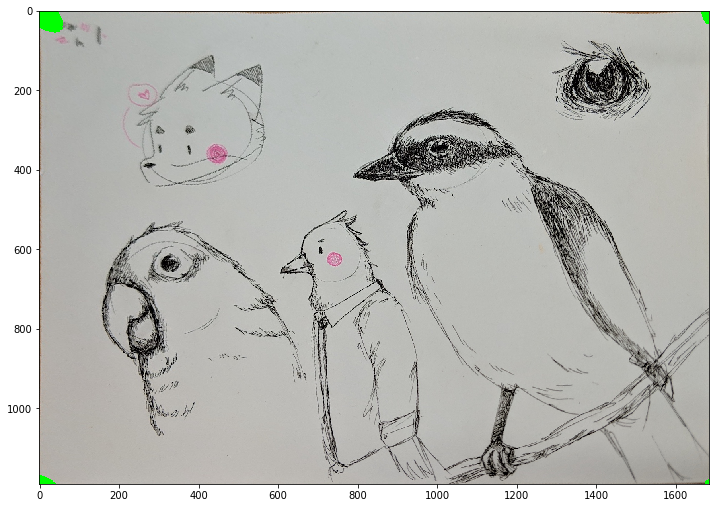

In [83]:
plt.figure(figsize=(12, 12))
plt.imshow(img_r)

## Referências

- Multiple View Geometry in Computer Vision. Hartley, R. e Zisserman, A. Capítulo 2.